## Monte Carlo - Predicting Gross Profit

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
#revenue mean
rev_m = 170 #million dollars

#revenue standard deviation
rev_std = 20  #million dollars


iterations = 1000

In [3]:
#revenues
rev = np.random.normal(rev_m, rev_std, iterations)
rev

array([178.34508832, 173.56122287, 194.27439252, 166.59204973,
       190.65111881, 132.58530066, 158.91074568, 178.56427841,
       168.21389596, 182.02309379, 194.58206751, 167.44222947,
       158.29124463, 180.52711996, 165.32166399, 147.85911875,
       135.21321883, 186.02920185, 132.52968005, 177.45107717,
       160.34062696, 166.11129178, 185.70582328, 159.20285938,
       191.2770357 , 189.8286575 , 180.26287732, 152.3584873 ,
       170.76922055, 154.17651161, 134.30279248, 200.95865525,
       173.63672932, 176.62266327, 175.10368969, 148.29794792,
       175.63245901, 186.618898  , 170.86684916, 162.60986103,
       139.36926646, 138.73147419, 164.43513395, 155.59756275,
       194.12443216, 149.61010675, 156.98738963, 192.0319114 ,
       213.26192825, 173.73389354, 175.42124637, 178.22162978,
       156.03878823, 158.62166273, 133.50965131, 171.96881126,
       169.38754273, 187.53234538, 148.74957594, 190.47002512,
       172.55008456, 164.64148399, 139.59408044, 177.03

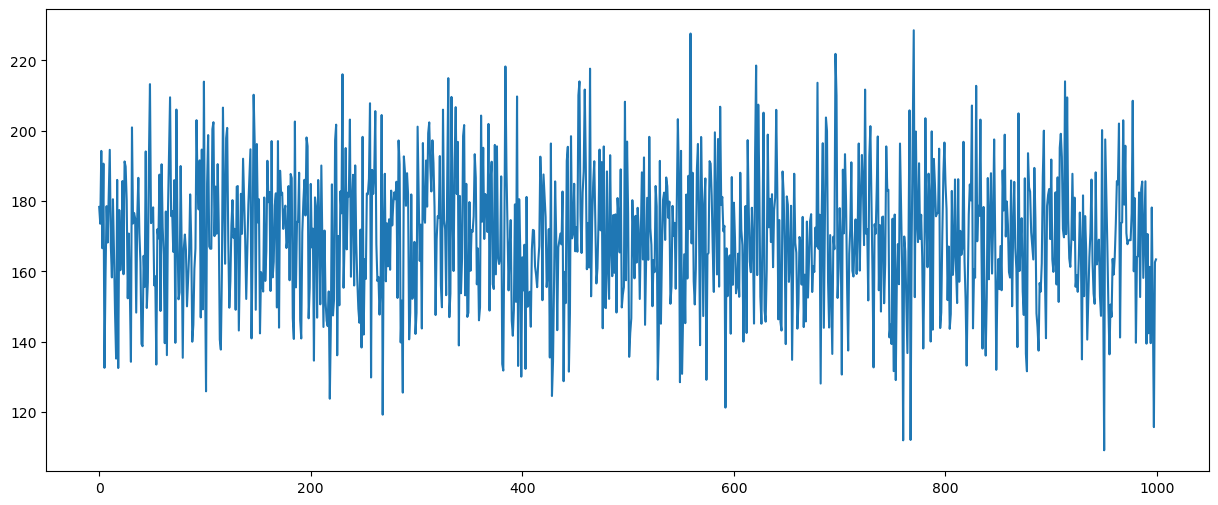

In [4]:
plt.figure(figsize = (15,6))
plt.plot(rev)
plt.show()

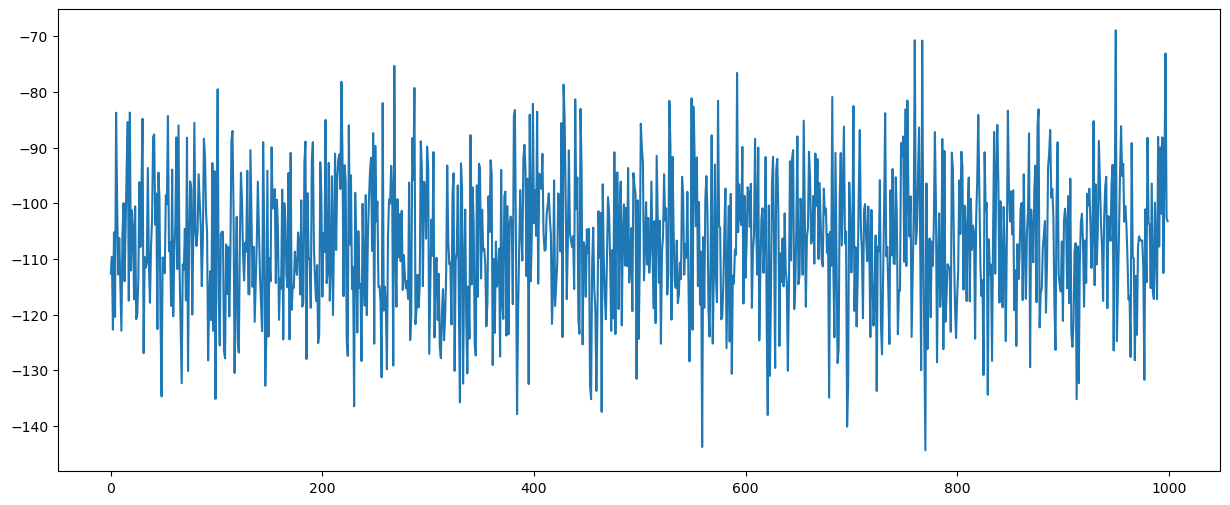

In [15]:
#COGS - Cost of goods sold
#OPEX - Operating Expenses

COGS = -(rev * np.random.normal(0.6,0.1))

plt.figure(figsize=(15,6))
plt.plot(COGS)
plt.show()

In [16]:
COGS.mean()

-107.19672798013599

In [17]:
COGS.std()

12.45562347603643

In [18]:
Gross_Profit = rev + COGS
Gross_Profit

array([65.69040245, 63.92834637, 71.55769273, 61.3613691 , 70.22312103,
       48.83555719, 58.53209043, 65.77113742, 61.95874878, 67.04513367,
       71.67101962, 61.67451846, 58.30390768, 66.49411697, 60.89344396,
       54.46141022, 49.80350648, 68.52071594, 48.81507027, 65.36110853,
       59.05876306, 61.18429003, 68.40160491, 58.63968558, 70.45366695,
       69.92018129, 66.39678765, 56.11867667, 62.89995945, 56.78831523,
       49.4681663 , 74.01972807, 63.9561579 , 65.05597626, 64.49648799,
       54.62304554, 64.69125124, 68.73792057, 62.9359193 , 59.89459712,
       51.33431646, 51.09939644, 60.56690559, 57.31173543, 71.50245737,
       55.10635709, 57.8236547 , 70.73171267, 78.55143097, 63.9919467 ,
       64.61345463, 65.64492858, 57.47425339, 58.42561161, 49.17602614,
       63.34180844, 62.39104175, 69.07437349, 54.7893951 , 70.15641823,
       63.55591065, 60.64291114, 51.41712289, 65.2086724 , 50.16300985,
       65.17817146, 71.13165829, 77.17105556, 64.72494936, 65.24

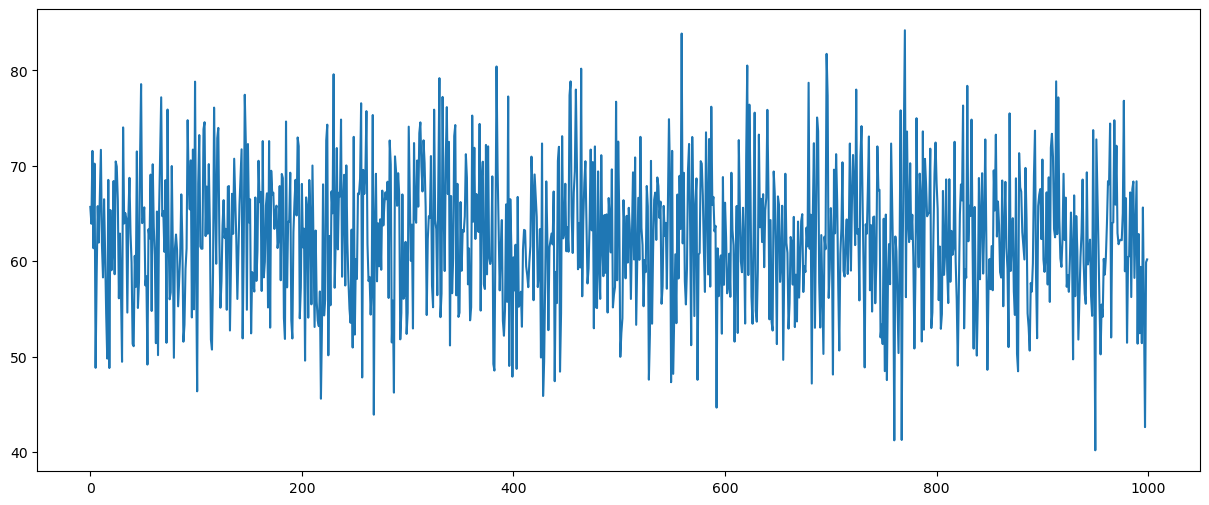

In [19]:
plt.figure(figsize=(15,6))
plt.plot(Gross_Profit)
plt.show()

In [20]:
max(Gross_Profit)

84.19419545875877

In [21]:
min(Gross_Profit)

40.198296526691436

In [22]:
Gross_Profit.mean()

62.50779670601234

In [23]:
Gross_Profit.std()

7.263034933594177

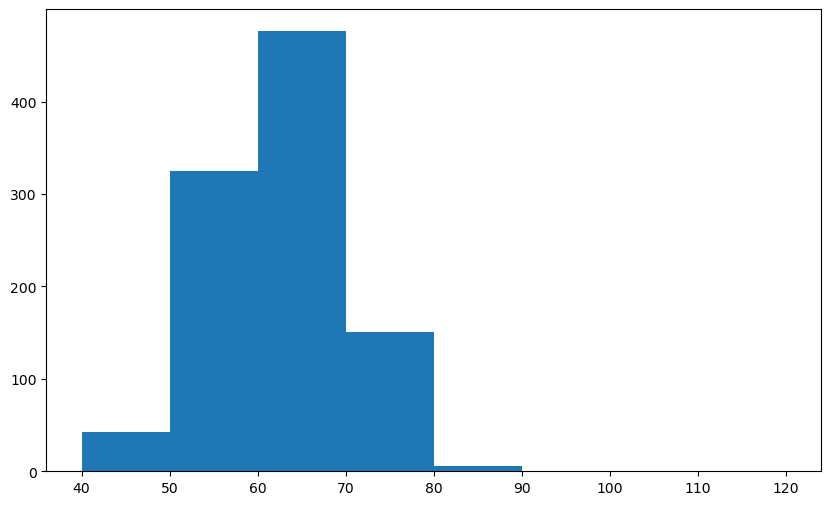

In [25]:
plt.figure(figsize=(10,6))
plt.hist(Gross_Profit, bins = [40,50,60,70,80,90,100,110,120])
plt.show()

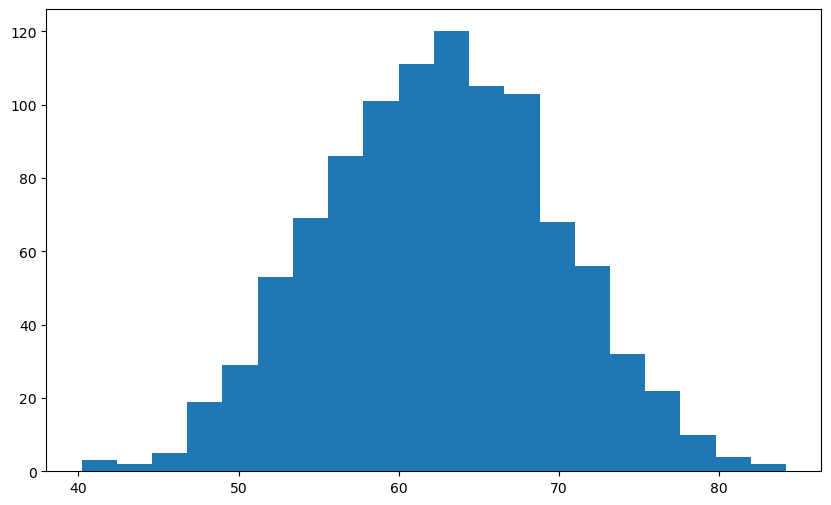

In [26]:
plt.figure(figsize = (10,6))
plt.hist(Gross_Profit, bins = 20)
plt.show()

## Forecasting Stock Prices with a Monte Carlo Simulation

Price today = Price yesterday * e^r

r : log return of share price between yesterday and today

e^ln(x) = x

x = (price today / price yesterday)

We can use Brownian motion in order to model r :

1) Drift - The direction rates of return have been headed in the past - ln(Current Price / Previous Price - Calculate average, standard deviation and variance of daily returns in the historical period 

Drift = (mu - 1/2 sigma^2) -> Expected daily return of the stock

2) Volatility - Random Variable = sigma * Z(Rand(0;1))

Price Today = Price Yesterday * e((mu - 1/2sigma^2) + sigma * Z[Rand(0;1)])

In [1]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
from scipy.stats import norm
%matplotlib inline

In [70]:
ticker = 'PG'
data = pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1')['Adj Close']

In [71]:
log_returns = np.log(1 + data.pct_change())
#pandas.pct_change() obtains simple returns from a provided dataset

In [72]:
log_returns.tail()

,PG
Date,
2021-08-23,-0.005113
2021-08-24,-0.008138
2021-08-25,-0.003568
2021-08-26,-0.001754
2021-08-27,-0.000351


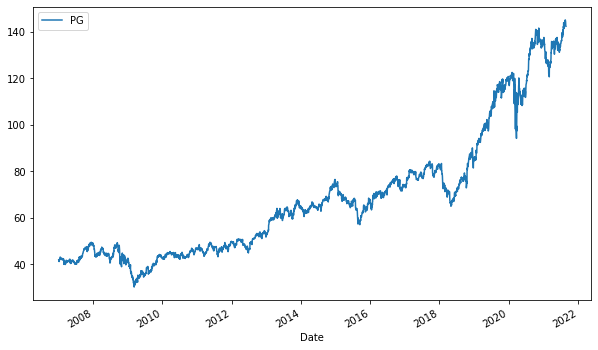

In [74]:
data.plot(figsize=(10, 6))
plt.show()

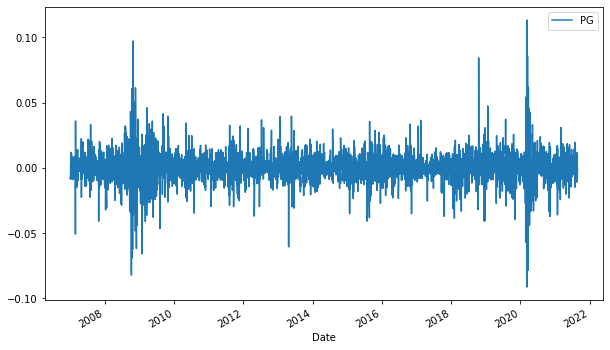

In [75]:
log_returns.plot(figsize = (10,6))
plt.show()

Brownian motion : 
r = drift + stdev * e^r

In [7]:
u = log_returns.mean()
u

ticker    0.000332
dtype: float64

In [8]:
var = log_returns.var()
var

ticker    0.000139
dtype: float64

                                         drift = u - 1/2 . var

In [10]:
drift = u - 0.5*var
drift

ticker    0.000263
dtype: float64

In [11]:
stdev = log_returns.std()
stdev

ticker    0.011777
dtype: float64

In [12]:
type(drift)

pandas.core.series.Series

In [13]:
type(stdev)

pandas.core.series.Series

In [14]:
np.array(drift)

array([0.00026269])

In [18]:
drift.values #object.values tranfers the object into a numpy array

array([0.00026269])

In [16]:
stdev.values

array([0.01177708])

In [19]:
norm.ppf(0.95)
#Z corresponds to the distance between the mean and the events, expressed as the number of standard deviations

#If an event has 95% chance if occuring, the distance between this event and 
#the mean will be approximately 1.65 standard deviations

1.6448536269514722

In [21]:
x = np.random.rand(10,2)
x

array([[0.15646144, 0.98281139],
       [0.25700979, 0.52690291],
       [0.6288877 , 0.86698467],
       [0.92049007, 0.59422472],
       [0.7424007 , 0.67635151],
       [0.83579761, 0.98100017],
       [0.64479162, 0.89074748],
       [0.67750621, 0.55323698],
       [0.73700168, 0.59854664],
       [0.20706753, 0.63737739]])

In [22]:
norm.ppf(x)

array([[-1.00910792,  2.11561915],
       [-0.65259163,  0.06748678],
       [ 0.32890883,  1.11225002],
       [ 1.40837565,  0.23842619],
       [ 0.65076437,  0.45752048],
       [ 0.97733207,  2.07485836],
       [ 0.37129643,  1.23051307],
       [ 0.46073662,  0.13384386],
       [ 0.63412901,  0.24958705],
       [-0.81663849,  0.35145741]])

In [23]:
#short cut
Z = norm.ppf(np.random.rand(10,2))
Z

array([[-0.08478872, -1.05241496],
       [-0.67670693,  0.41640414],
       [ 0.28947496, -1.31419457],
       [-0.26986943, -0.05168493],
       [-0.35506579, -0.97429643],
       [ 0.96895494, -0.77992332],
       [-1.03076196,  0.27277807],
       [-0.60109619,  1.15624412],
       [ 1.7264863 , -0.13757666],
       [ 0.17499137, -1.17507706]])

In [24]:
t_intervals = 1000
iterations = 10

              daily_returns = e^r
              r = drift + stdev * Z

In [27]:
daily_returns = np.exp(drift.values + stdev.values * norm.ppf(np.random.rand(t_intervals,iterations)))
daily_returns #1000 * 10 array --> daily return values --> 10 sets of 1000 random future stock prices

array([[1.01119121, 1.00369505, 1.02028599, ..., 1.00410985, 0.98760004,
        1.00710998],
       [1.00840793, 1.00979696, 1.00778134, ..., 0.97659825, 0.99047687,
        1.01497721],
       [1.00659599, 1.00439845, 1.0006662 , ..., 0.99989028, 1.00663988,
        1.00426982],
       ...,
       [0.99729627, 0.98079376, 0.99067623, ..., 0.98729849, 1.02659895,
        0.9965263 ],
       [1.00743204, 1.0061269 , 0.99261402, ..., 0.9966574 , 0.99740184,
        1.01285962],
       [0.98826491, 1.00121349, 0.97114968, ..., 1.00631885, 0.98889095,
        1.0077821 ]])

 ## Forecasting Stock Prices - Part II


       St = S0 * DAILY_RETURN(t)        S - price t - Day
       St+1 = St * DAILY_RETURN(t+1)
       ....
       St+999 = St+998 * DAILY_RETURN(t+999)


In [30]:
S0 = data.iloc[-1] #current stock price --> last value
S0

ticker    142.440002
Name: 2021-08-27 00:00:00, dtype: float64

In [31]:
price_list = np.zeros_like(daily_returns) 

In [32]:
price_list

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [33]:
price_list[0] = S0
price_list

array([[142.44000244, 142.44000244, 142.44000244, ..., 142.44000244,
        142.44000244, 142.44000244],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       ...,
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ],
       [  0.        ,   0.        ,   0.        , ...,   0.        ,
          0.        ,   0.        ]])

In [35]:
for t in range(1, t_intervals):
    price_list[t] = price_list[t - 1] * daily_returns[t]

In [36]:
price_list

array([[142.44000244, 142.44000244, 142.44000244, ..., 142.44000244,
        142.44000244, 142.44000244],
       [143.63762771, 143.83548094, 143.54837625, ..., 139.10665657,
        141.08352822, 144.5733567 ],
       [144.58505967, 144.46813469, 143.64400761, ..., 139.09139346,
        142.02030589, 145.19065848],
       ...,
       [121.41137249,  80.11467245, 145.70897884, ..., 243.10737078,
        111.67554954, 214.06170192],
       [122.31370699,  80.60552739, 144.63277582, ..., 242.29476112,
        111.3853983 , 216.8144546 ],
       [120.87834514,  80.70334171, 140.46007325, ..., 243.8257852 ,
        110.14801243, 218.50172706]])

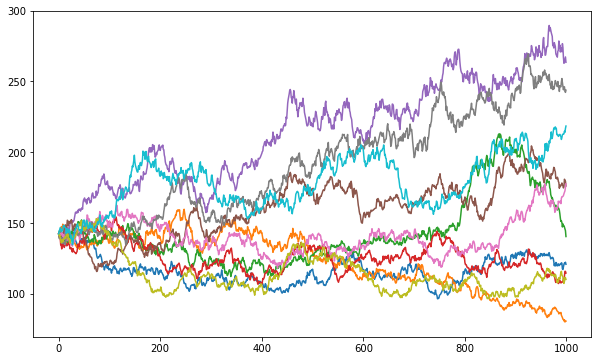

In [40]:
plt.figure(figsize=(10,6))
plt.plot(price_list)
plt.show()

# Derivatives
A derivative is a financial instrument, whose price is derived based on the development of one or more underlying assets
##### Stocks, Bonds, Interest rates, commodities, exchange rates
##### A contract involving at least two parties describing how they will exhange payments

## Black Scholes formula :
### It calculates the value of a call by taking the difference between the amount you get if you exercise the option the option minus the amount you have to pay if you exercise the option.

In [41]:
import numpy as np
import pandas as pd
from pandas_datareader import data as wb
from scipy.stats import norm

In [44]:
def d1(S, K, r, stdev, t):
    return (np.log(S/K) + (r + stdev**2/2)*t) / (S*np.sqrt(t))

def d2(S, K, r, stdev, t):
    return (np.log(S/K) + (r - stdev**2/2)*t) / (S*np.sqrt(t))

In [45]:
norm.cdf(0) #what portion of data lies below 0
#Cumulative Distribution Function(cdf) shows how the data accumulates in time

#since 0 is the mean of the standard normal distribution, 50% of the data lies below 0

0.5

In [46]:
norm.cdf(0.25)

0.5987063256829237

In [47]:
norm.cdf(0.75)

0.7733726476231317

In [48]:
norm.cdf(9)

1.0

C = SN(d1) - Ke^-(rt) * N(d2)

In [62]:
def BSM(S, K, r, stdev, t):
    return (S* norm.cdf(d1(S, K, r, stdev, t))) - (K * np.exp(-r*t) * d1(S, K, r, stdev, t))

In [51]:
PG = 'PG'
data = pd.DataFrame()
data['PG'] = wb.DataReader(PG, data_source = 'yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']
data

,PG
Date,
2007-01-03,41.847801
2007-01-04,41.530083
2007-01-05,41.173473
2007-01-08,41.264248
2007-01-09,41.160492
...,...
2017-03-15,80.391212
2017-03-16,80.426361
2017-03-17,80.039368


In [52]:
S = data.iloc[-1]
S

PG    80.206482
Name: 2017-03-21 00:00:00, dtype: float64

In [53]:
log_returns = np.log(1 + data.pct_change())

In [64]:
stdev = log_returns.std() *250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [65]:
r = 0.025 #rate
K = 110 #strike price
t=1 #1 year

In [66]:
d1(S,K,r, stdev, t)

PG   -0.003432
dtype: float64

In [67]:
d2(S,K,r, stdev, t)

PG   -0.003821
dtype: float64

In [68]:
BSM(S,K,r, stdev, t) #price of the call option

PG    40.361645
dtype: float64

## Euler Discretization

In [69]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas_datareader import data as wb
from scipy.stats import norm
%matplotlib inline

In [77]:
ticker = 'PG'
data= pd.DataFrame()
data[ticker] = wb.DataReader(ticker, data_source='yahoo', start='2007-1-1', end='2017-3-21')['Adj Close']
data

,PG
Date,
2007-01-03,41.847801
2007-01-04,41.530083
2007-01-05,41.173473
2007-01-08,41.264248
2007-01-09,41.160492
...,...
2017-03-15,80.391212
2017-03-16,80.426361
2017-03-17,80.039368


In [78]:
log_returns = np.log(1 + data.pct_change())

### St = St-1. e^((r - 1/2 * stdev^2) * delta(t) + stdev * delta(t)^0.5 * Zt)

In [79]:
r = 0.025

In [84]:
stdev = log_returns.std() * 250 ** 0.5
stdev

PG    0.17655
dtype: float64

In [85]:
type(stdev)

pandas.core.series.Series

In [86]:
stdev = stdev.values
stdev

array([0.1765502])

In [94]:
T = 1.0
t_intervals = 250
delta_t = T/t_intervals
iterations = 10000

In [99]:
Z = np.random.standard_normal((t_intervals + 1, iterations))
S = np.zeros_like(Z)
S0 = data.iloc[-1]
S[0] = S0
S

array([[80.20648193, 80.20648193, 80.20648193, ..., 80.20648193,
        80.20648193, 80.20648193],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ]])

St = St-1. e^((r - 1/2 * stdev^2) * delta(t) + stdev * delta(t)^0.5 * Zt)

In [100]:
for t in range(1, t_intervals+1):
    S[t] = S[t - 1] * np.exp((r - 1/2*stdev**2) * delta_t + stdev * delta_t**0.5 * Z[t])

In [101]:
S

array([[ 80.20648193,  80.20648193,  80.20648193, ...,  80.20648193,
         80.20648193,  80.20648193],
       [ 81.24404282,  79.83949747,  80.34535453, ...,  80.32158769,
         78.78942262,  78.73969265],
       [ 82.15164399,  80.61748228,  80.50409911, ...,  80.96214991,
         77.82038266,  79.80611055],
       ...,
       [ 74.86224162,  81.10202332,  87.85730717, ...,  95.19378549,
         97.92764283, 101.02664547],
       [ 76.40842339,  80.51399786,  88.81127835, ...,  95.9112265 ,
         98.90925018, 103.14146677],
       [ 75.61892727,  80.89512115,  88.40520191, ...,  95.52029025,
         97.0672761 , 103.68462691]])

In [102]:
S.shape

(251, 10000)

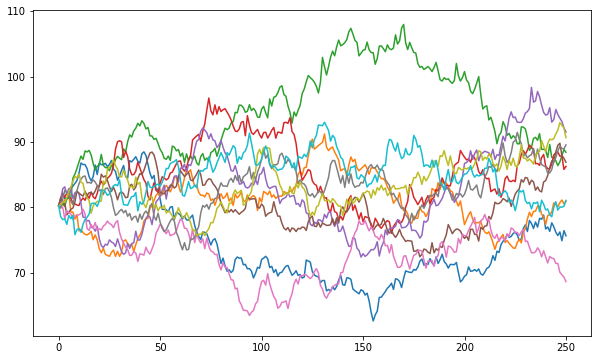

In [108]:
plt.figure(figsize=(10, 6))
plt.plot(S[ : , :10])
plt.show()

Call Option:

Buy if : S-K > 0

Don't buy if : S-K < 0

In [109]:
p = np.maximum(S[-1] - K, 0) #pay-off

In [110]:
p

array([0., 0., 0., ..., 0., 0., 0.])

In [112]:
p.shape

(10000,)

C = e^(-rt) * summation(Pi) / iterations 

In [115]:
C = np.exp(-r * T) * np.sum(p) / iterations  #to discount the average of the pay-off
C

0.3739024061371198